**Employee Attrition Predictathon**

**Name: Sarthak Wakchaure**

**Importing libraries**

In [613]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

**Loading datasets**

In [614]:
#training dataset
train_data=pd.read_csv('train.csv')
train_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,28,1,Travel_Frequently,Research & Development,6,4,Medical,1,2336,Male,...,5.0,Y,19,8,3,18.0,2,1,0,2
1,22,0,Travel_Rarely,Sales,6,4,Medical,1,3511,Female,...,9.0,Y,13,8,0,3.0,3,9,15,5
2,26,0,Travel_Rarely,Sales,14,4,Other,1,3209,Female,...,0.0,Y,11,8,3,4.0,3,8,6,0
3,40,0,Travel_Rarely,Human Resources,1,4,Life Sciences,1,3558,Male,...,5.0,Y,12,8,3,5.0,3,1,0,1
4,28,1,Travel_Frequently,Research & Development,9,3,Medical,1,4032,Male,...,5.0,Y,15,8,3,11.0,2,1,0,0


In [615]:
#testing dataset
test_data=pd.read_csv('test.csv')
test_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,27,Travel_Frequently,Sales,24,3,Life Sciences,1,4344,Male,3,...,1.0,Y,14,8,0,5.0,5,3,7,2
1,25,Travel_Rarely,Research & Development,7,3,Life Sciences,1,4408,Male,1,...,0.0,Y,12,8,0,9.0,3,4,0,2
2,32,Travel_Rarely,Research & Development,5,4,Technical Degree,1,2873,Female,2,...,8.0,Y,24,8,0,6.0,3,2,3,0
3,33,Travel_Rarely,Research & Development,6,3,Medical,1,2542,Male,2,...,3.0,Y,14,8,0,29.0,3,3,3,8
4,21,Travel_Rarely,Research & Development,2,2,Life Sciences,1,3739,Female,2,...,3.0,Y,12,8,0,3.0,1,3,3,2


In [616]:
#submission dataset
sub_data=pd.read_csv('submission.csv')
sub_data.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


**Data pre-processing & Visualization**

In [617]:
train_data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,33979.000000,35000.000000,35000.0,35000.000000,34199.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,29.567943,0.195943,5.713543,3.134514,1.0,3150.459657,2.005457,71783.247743,3.024515,15.165971,8.0,0.852714,8.802889,2.833686,4.166400,2.323200,3.624343
std,7.741643,0.396930,6.244575,0.998022,0.0,1144.133678,1.223712,47855.047498,2.671635,3.536202,0.0,0.937849,6.631972,1.414324,3.793782,3.456579,2.792156
min,18.000000,0.000000,1.000000,1.000000,1.0,3.000000,1.000000,10100.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,2.000000,1.0,2443.000000,1.000000,34454.500000,1.000000,13.000000,8.0,0.000000,4.000000,2.000000,2.000000,0.000000,2.000000
50%,28.000000,0.000000,3.000000,3.000000,1.0,3438.000000,2.000000,59572.500000,3.000000,14.000000,8.0,1.000000,8.000000,3.000000,3.000000,1.000000,2.000000
75%,34.000000,0.000000,7.000000,4.000000,1.0,4146.000000,2.000000,91604.250000,5.000000,17.000000,8.0,1.000000,11.000000,3.000000,5.000000,3.000000,6.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199982.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [618]:
train_data.shape

(35000, 24)

In [619]:
train_data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [620]:
#Null values 
train_data.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked         1021
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears           801
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [621]:
#Unique values
train_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeID                  4274
Gender                         2
JobLevel                       5
JobRole                        9
MaritalStatus                  3
MonthlyIncome              30181
NumCompaniesWorked            10
Over18                         1
PercentSalaryHike             15
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
YearsAtCompany                41
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [622]:
#Count of values for two class(0 & 1)
train_data['Attrition'].value_counts()

0    28142
1     6858
Name: Attrition, dtype: int64

In [623]:
train_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,28,1,Travel_Frequently,Research & Development,6,4,Medical,1,2336,Male,...,5.0,Y,19,8,3,18.0,2,1,0,2
1,22,0,Travel_Rarely,Sales,6,4,Medical,1,3511,Female,...,9.0,Y,13,8,0,3.0,3,9,15,5
2,26,0,Travel_Rarely,Sales,14,4,Other,1,3209,Female,...,0.0,Y,11,8,3,4.0,3,8,6,0
3,40,0,Travel_Rarely,Human Resources,1,4,Life Sciences,1,3558,Male,...,5.0,Y,12,8,3,5.0,3,1,0,1
4,28,1,Travel_Frequently,Research & Development,9,3,Medical,1,4032,Male,...,5.0,Y,15,8,3,11.0,2,1,0,0


In [624]:
test_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,27,Travel_Frequently,Sales,24,3,Life Sciences,1,4344,Male,3,...,1.0,Y,14,8,0,5.0,5,3,7,2
1,25,Travel_Rarely,Research & Development,7,3,Life Sciences,1,4408,Male,1,...,0.0,Y,12,8,0,9.0,3,4,0,2
2,32,Travel_Rarely,Research & Development,5,4,Technical Degree,1,2873,Female,2,...,8.0,Y,24,8,0,6.0,3,2,3,0
3,33,Travel_Rarely,Research & Development,6,3,Medical,1,2542,Male,2,...,3.0,Y,14,8,0,29.0,3,3,3,8
4,21,Travel_Rarely,Research & Development,2,2,Life Sciences,1,3739,Female,2,...,3.0,Y,12,8,0,3.0,1,3,3,2


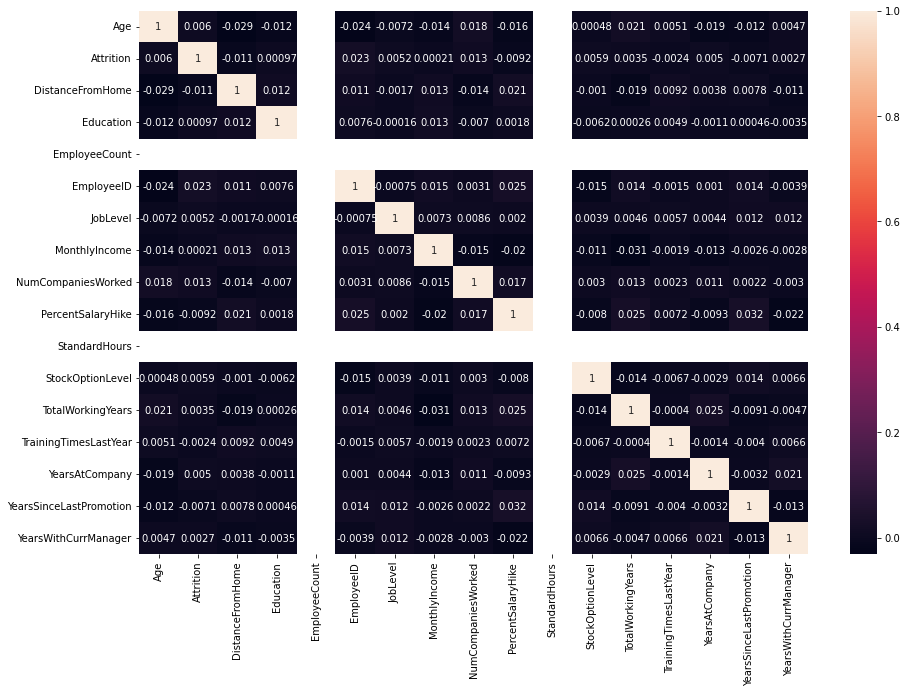

In [625]:
#Correlation 
correlation=train_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

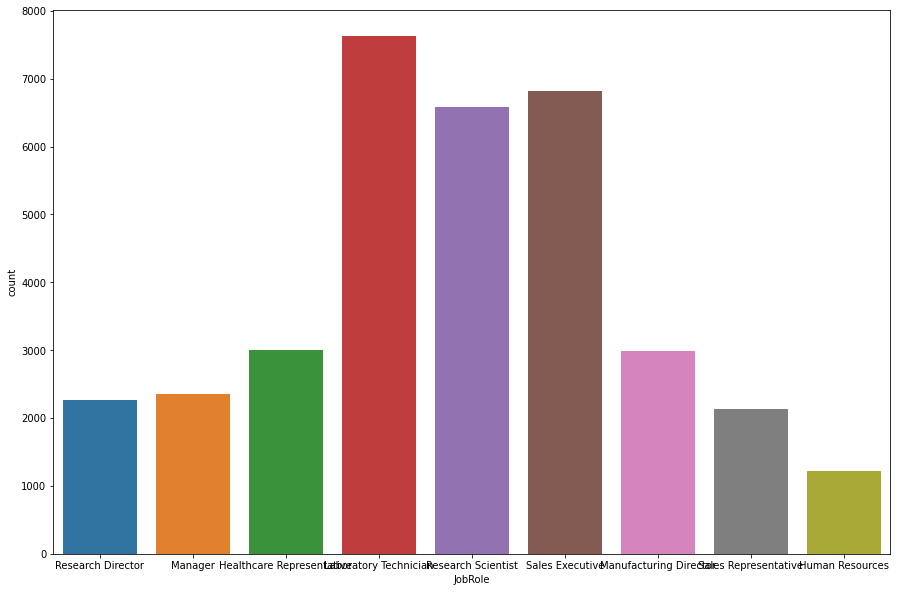

In [626]:
#Count of employees Role wise
plt.figure(figsize=(15,10))
sns.countplot(train_data['JobRole'])

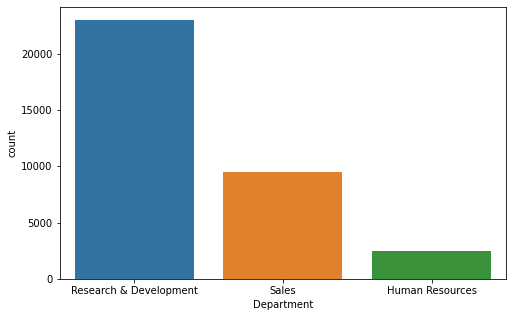

In [627]:
#Count of employees Department wise
plt.figure(figsize=(8,5))
sns.countplot(train_data['Department'])

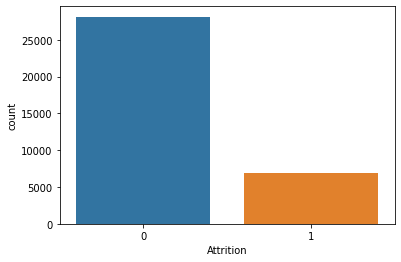

In [628]:
#Visualization of attrition class(0 & 1)
sns.countplot(train_data['Attrition'])

In [629]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder

In [630]:
encoder=LabelEncoder()

In [631]:
#Encoding categorical data for training and testing dataset
train_data['Department']=encoder.fit_transform(train_data['Department'])
train_data['EducationField']=encoder.fit_transform(train_data['EducationField'])
train_data['JobRole']=encoder.fit_transform(train_data['JobRole'])
train_data['Over18']=encoder.fit_transform(train_data['Over18'])
train_data['BusinessTravel']=encoder.fit_transform(train_data['BusinessTravel'])
train_data['Gender']=encoder.fit_transform(train_data['Gender'])
train_data['MaritalStatus']=encoder.fit_transform(train_data['MaritalStatus'])

test_data['Department']=encoder.fit_transform(test_data['Department'])
test_data['EducationField']=encoder.fit_transform(test_data['EducationField'])
test_data['JobRole']=encoder.fit_transform(test_data['JobRole'])
test_data['Over18']=encoder.fit_transform(test_data['Over18'])
test_data['BusinessTravel']=encoder.fit_transform(test_data['BusinessTravel'])
test_data['Gender']=encoder.fit_transform(test_data['Gender'])
test_data['MaritalStatus']=encoder.fit_transform(test_data['MaritalStatus'])

In [632]:
train_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [633]:
#Filling null values
train_data.fillna(train_data['NumCompaniesWorked'].mean(),inplace=True)
train_data.fillna(train_data['TotalWorkingYears'].mean(),inplace=True)

In [634]:
#Filling null values
test_data.fillna(train_data['NumCompaniesWorked'].mean(),inplace=True)
test_data.fillna(train_data['TotalWorkingYears'].mean(),inplace=True)

In [635]:
#Null values filled with mean
train_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [636]:
#Null values filled with mean
test_data.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [637]:
train_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,28,1,1,1,6,4,3,1,2336,1,...,5.0,0,19,8,3,18.0,2,1,0,2
1,22,0,2,2,6,4,3,1,3511,0,...,9.0,0,13,8,0,3.0,3,9,15,5
2,26,0,2,2,14,4,4,1,3209,0,...,0.0,0,11,8,3,4.0,3,8,6,0
3,40,0,2,0,1,4,1,1,3558,1,...,5.0,0,12,8,3,5.0,3,1,0,1
4,28,1,1,1,9,3,3,1,4032,1,...,5.0,0,15,8,3,11.0,2,1,0,0


In [638]:
test_data.head(7)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,27,1,2,24,3,1,1,4344,1,3,...,1.0,0,14,8,0,5.0,5,3,7,2
1,25,2,1,7,3,1,1,4408,1,1,...,0.0,0,12,8,0,9.0,3,4,0,2
2,32,2,1,5,4,5,1,2873,0,2,...,8.0,0,24,8,0,6.0,3,2,3,0
3,33,2,1,6,3,3,1,2542,1,2,...,3.0,0,14,8,0,29.0,3,3,3,8
4,21,2,1,2,2,1,1,3739,0,2,...,3.0,0,12,8,0,3.0,1,3,3,2
5,32,2,1,1,1,1,1,3404,1,2,...,1.0,0,23,8,2,5.0,2,6,3,6
6,54,0,2,3,2,1,1,2771,1,5,...,3.0,0,13,8,1,4.0,3,5,3,3


In [639]:
#Deciding features and target
x=train_data.drop(['Attrition'],axis=1)
y=train_data['Attrition']

In [640]:
#Features
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,28,1,1,6,4,3,1,2336,1,2,...,5.0,0,19,8,3,18.0,2,1,0,2
1,22,2,2,6,4,3,1,3511,0,1,...,9.0,0,13,8,0,3.0,3,9,15,5
2,26,2,2,14,4,4,1,3209,0,1,...,0.0,0,11,8,3,4.0,3,8,6,0
3,40,2,0,1,4,1,1,3558,1,2,...,5.0,0,12,8,3,5.0,3,1,0,1
4,28,1,1,9,3,3,1,4032,1,2,...,5.0,0,15,8,3,11.0,2,1,0,0


In [641]:
#target
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [642]:
#Shape of training
train_data.shape

(35000, 24)

In [643]:
#shape of testing data
test_data.shape

(15000, 23)

**Building model**

In [644]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [645]:
rf = RandomForestClassifier()

In [646]:
#training model
rf.fit(x,y)

RandomForestClassifier()

In [647]:
#testing model with testing data
x_test=test_data
x_test[:8]

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,27,1,2,24,3,1,1,4344,1,3,...,1.0,0,14,8,0,5.0,5,3,7,2
1,25,2,1,7,3,1,1,4408,1,1,...,0.0,0,12,8,0,9.0,3,4,0,2
2,32,2,1,5,4,5,1,2873,0,2,...,8.0,0,24,8,0,6.0,3,2,3,0
3,33,2,1,6,3,3,1,2542,1,2,...,3.0,0,14,8,0,29.0,3,3,3,8
4,21,2,1,2,2,1,1,3739,0,2,...,3.0,0,12,8,0,3.0,1,3,3,2
5,32,2,1,1,1,1,1,3404,1,2,...,1.0,0,23,8,2,5.0,2,6,3,6
6,54,0,2,3,2,1,1,2771,1,5,...,3.0,0,13,8,1,4.0,3,5,3,3
7,22,1,1,5,4,1,1,4175,0,5,...,9.0,0,24,8,0,9.0,3,4,0,6


In [648]:
#predicting attrition for testing data
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [649]:
#Updating submission file with new attrition values
sub_data['Attrition']=y_pred

In [650]:
sub_data.to_csv("newsubmission.csv", index=False)

**For the prediciton of employee attrition I have build model in which I used Random forest algorithm and atlast I have updated the submission file with the new data.**